In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(30)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], inplace=True)

In [3]:
# Normalization
application_df['ASK_AMT_LOG'] = np.log(application_df['ASK_AMT'] + 1)

In [4]:
# Adjusted bins
bins = [0, 500, 2000, 10000, 50000, 200000, 1e6, 1e9]
labels = ['Very Low', 'Low', 'Somewhat Low', 'Medium', 'Somewhat High', 'High', 'Very High']

application_df['ASK_AMT'] = pd.cut(application_df['ASK_AMT'], bins=bins, labels=labels)


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T15', 'T29', 'T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_types_to_replace = classification_counts[classification_counts == 1].index.tolist()

for cls in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

print(application_df['CLASSIFICATION'].value_counts())


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
Other       26
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C1267        2
C1256        2
C1234        2
C1246        2
C3200        2
Name: CLASSIFICATION, dtype: int64


In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
cutoff = 12
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls, "Other")

# Check to make sure binning was successful
print(application_df['CLASSIFICATION'].value_counts())

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
Other      129
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
Name: CLASSIFICATION, dtype: int64


In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)


In [9]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(['IS_SUCCESSFUL'], axis=1).values
y = application_df_encoded['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Another layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Dropout layer
nn.add(tf.keras.layers.Dropout(rate=0.2))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               8640      
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 20)                1220      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 17141 (66.96 KB)
Trainable params: 17141 (66.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the model
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=200, validation_split=0.2, verbose=2)

Epoch 1/100
103/103 - 6s - loss: 2.1276 - accuracy: 0.6569 - val_loss: 0.5903 - val_accuracy: 0.7092 - 6s/epoch - 55ms/step
Epoch 2/100
103/103 - 1s - loss: 2.0975 - accuracy: 0.6749 - val_loss: 0.5758 - val_accuracy: 0.7180 - 1s/epoch - 11ms/step
Epoch 3/100
103/103 - 1s - loss: 2.1358 - accuracy: 0.6731 - val_loss: 0.5754 - val_accuracy: 0.7277 - 835ms/epoch - 8ms/step
Epoch 4/100
103/103 - 1s - loss: 2.1612 - accuracy: 0.6739 - val_loss: 0.5740 - val_accuracy: 0.7223 - 1s/epoch - 11ms/step
Epoch 5/100
103/103 - 1s - loss: 2.1237 - accuracy: 0.6765 - val_loss: 0.5712 - val_accuracy: 0.7182 - 1s/epoch - 11ms/step
Epoch 6/100
103/103 - 1s - loss: 2.0445 - accuracy: 0.6807 - val_loss: 0.5801 - val_accuracy: 0.7143 - 942ms/epoch - 9ms/step
Epoch 7/100
103/103 - 1s - loss: 2.0899 - accuracy: 0.6777 - val_loss: 0.5766 - val_accuracy: 0.7248 - 864ms/epoch - 8ms/step
Epoch 8/100
103/103 - 1s - loss: 2.0945 - accuracy: 0.6792 - val_loss: 0.5738 - val_accuracy: 0.7209 - 1s/epoch - 11ms/step
Ep

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5880 - accuracy: 0.7159 - 439ms/epoch - 2ms/step
Loss: 0.588024914264679, Accuracy: 0.7159183621406555


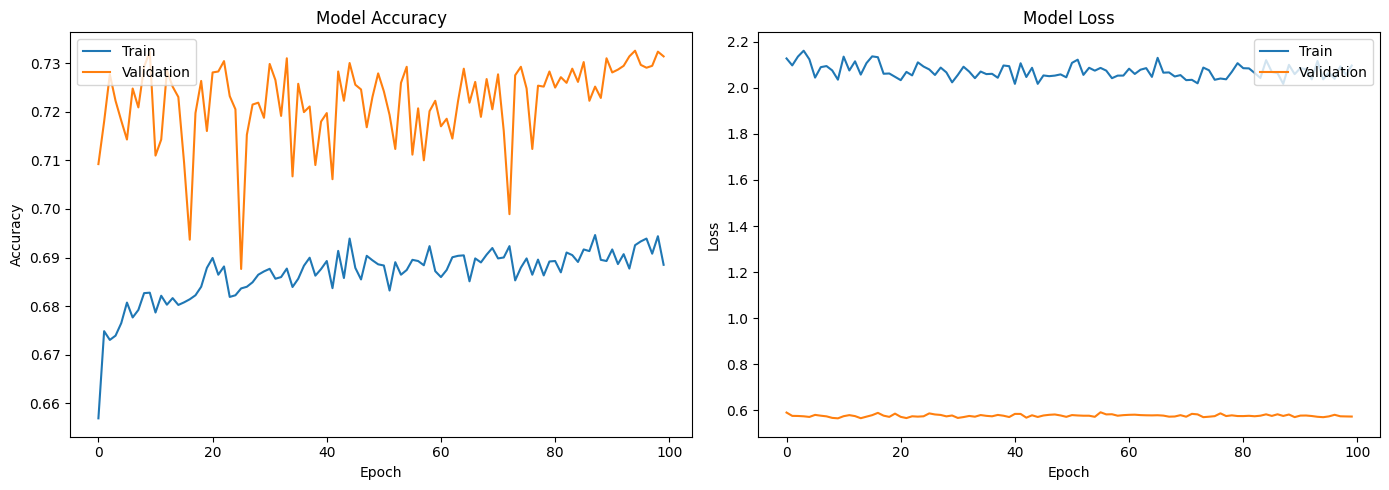

In [15]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [16]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
